# Geatpy样例
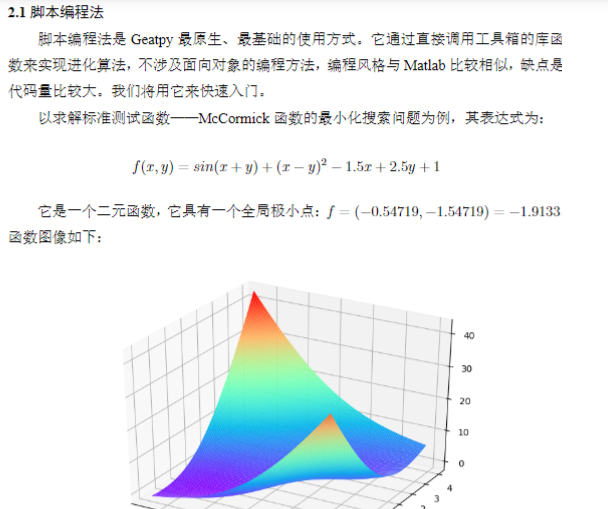

In [ ]:
#-*-coding:utf-8-*-
"""demo.py"""
import numpy as np
import geatpy as ea#导入geatpy库
import time

In [ ]:
"""============================目标函数============================"""
def aim(Phen):        
    """   
        # 传入种群染色体矩阵解码后的基因表现型矩阵 | (NIND, variable_cnt)
    """
    x1 = Phen[:, [0]] # 取出第一列，得到所有个体的第一个自变量
    x2 = Phen[:, [1]] # 取出第二列，得到所有个体的第二个自变量        
    score = np.sin(x1 + x2) + (x1 - x2) ** 2 - 1.5 * x1 + 2.5 * x2 +1    # (NIND, 1)

    return score

"""============================变量设置============================"""
x1 = [-1.5, 4]                 # 第一个决策变量范围
b1 = [1, 1]                    # 第一个决策变量边界，1表示包含范围的边界，0表示不包含

x2 = [-3, 4]                   # 第二个决策变量范围
b2 = [1, 1]                    # 第二个决策变量边界，1表示包含范围的边界，0表示不包含

ranges=np.vstack([x1, x2]).T   # 生成自变量的范围矩阵，使得第一行为所有决策变量的下界，第二行为上界 | (2, 2)
borders=np.vstack([b1, b2]).T  # 生成自变量的边界矩阵                                               | (2, 2)
varTypes = np.array([0, 0])    # 决策变量的类型，0表示连续，1表示离散                               | (2,  )

"""==========================染色体编码设置========================="""
Encoding ='BG'     # 'BG'表示采用二进制/格雷编码
codes = [1, 1]     # 决策变量的编码方式，两个1表示变量均使用格雷编码
precisions =[6, 6] # 决策变量的编码精度，表示解码后能表示的决策变量的精度可达到小数点后6位
scales = [0, 0]    # 0表示采用算术刻度，1表示采用对数刻度

# 调用函数创建译码矩阵 | (8,2)
FieldD =ea.crtfld(Encoding,
                  varTypes,  # (2, )
                  ranges,    # (2,2)
                  borders,   # (2,2)
                  precisions,# (2, )
                  codes,     # (2,)
                  scales     # (2,)
                 )    


"""=========================遗传算法参数设置========================"""
NIND     = 20                        # 种群个体数目
MAXGEN   = 100                       # 最大遗传代数
Lind =int(np.sum(FieldD[0, :]))      # 计算染色体长度 | 46
maxormins = np.array([1])            # 表示目标函数是最小化，元素为-1则表示对应的目标函数是最大化

selectStyle ='sus'                   # 采用随机抽样选择

recStyle ='xovdp'                    # 采用两点交叉
pc= 0.9                              # 交叉概率

mutStyle ='mutbin'                   # 采用二进制染色体的变异算子
pm= 1/Lind                           # 变异概率

obj_trace = np.zeros((MAXGEN, 2))    # 定义目标函数值记录器
var_trace = np.zeros((MAXGEN, Lind)) # 染色体记录器，记录历代最优个体的染色体


"""=========================开始遗传算法进化========================"""
start_time = time.time()                # 开始计时

Chrom = ea.crtpc(Encoding, NIND, FieldD)# 生成种群染色体矩阵 | (20, 46)
variable = ea.bs2ri(Chrom, FieldD)      # 对初始种群进行解码 | (20, 2)
ObjV = aim(variable)                    # 计算初始种群个体的目标函数值 | (20, 1)
best_ind = np.argmin(ObjV)              # 计算当代最优个体的序号

# 开始进化
for gen in range(MAXGEN):
    FitnV = ea.ranking(maxormins * ObjV)                      # 根据目标函数大小分配适应度值（）
    SelCh = Chrom[ea.selecting(selectStyle, FitnV, NIND-1),:] # 选择（selectStyle, FitnV。 NIND-1）

    SelCh = ea.recombin(recStyle, SelCh, pc)                  # 重组（recStyle, pc）
    SelCh = ea.mutate(mutStyle, Encoding, SelCh, pm)          # 变异（mutStyle, Encoding, pm）
    
    Chrom = np.vstack([Chrom[best_ind, :], SelCh]) # 把父代精英个体与子代的染色体进行合并，得到新一代种群
    Phen = ea.bs2ri(Chrom, FieldD)                 # 对种群进行解码(二进制转十进制)
    ObjV = aim(Phen)                               # 求种群个体的目标函数值

    # 记录
    best_ind = np.argmin(ObjV)                     # 计算当代最优个体的序号
    obj_trace[gen, 0]=np.sum(ObjV)/ObjV.shape[0]   # 记录当代种群的目标函数均值
    obj_trace[gen, 1]=ObjV[best_ind]               # 记录当代种群最优个体目标函数值
    var_trace[gen, :]=Chrom[best_ind,:]            # 记录当代种群最优个体的染色体

# 进化完成
end_time = time.time() # 结束计时
ea.trcplot(obj_trace, [['种群个体平均目标函数值','种群最优个体目标函数值']]) # 绘制图像

In [ ]:
"""============================输出结果============================"""
best_gen = np.argmin(obj_trace[:, [1]])
print('最优解的目标函数值：', obj_trace[best_gen, 1])
variable = ea.bs2ri(var_trace[[best_gen], :], FieldD)

#解码得到表现型（即对应的决策变量值）
print('最优解的决策变量值为：')
for i in range(variable.shape[1]):
    print('x'+str(i)+'=',variable[0, i])
    print('用时：', end_time - start_time,'秒')

In [2]:
!pip install pyautogui
!pip install pynput

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


     -------------------------------------- 89.2/89.2 KB 506.3 kB/s eta 0:00:00


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


- 扫雷小游戏：http://www.saolei123.com/

## 初始化（标记雷区、判断区坐标）

In [1]:
from saolei import Operator

In [2]:
optor = Operator()
optor

请点击雷区左上角
鼠标Button.left键在(392, 262)处按下
请点击雷区右下角
鼠标Button.left键在(871, 516)处按下
请输入雷区每行有多少block30
请输入雷区每列有多少block16
请点击判断结束区域左上角
鼠标Button.left键在(621, 220)处按下
请点击判断结束区域右下角
鼠标Button.left键在(644, 241)处按下


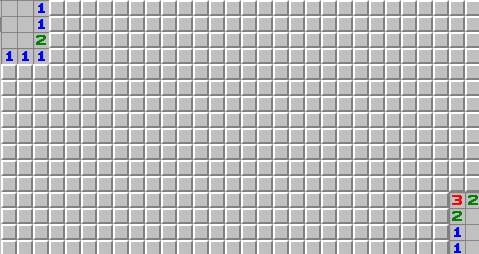

In [3]:
optor.screen_shot(optor.lei_rect)

In [4]:
optor.screen_shot(optor.j_rect)

# 截图获取训练数据

## Judge区域

In [5]:
optor.gen_train_img('not ovr')

In [6]:
optor.gen_train_img('ovr')

## 雷区

In [6]:
""" 未打开的格子 """
optor.gen_train_img('closed', (0,0))

In [7]:
""" 打开且为空白的格子 """
optor.gen_train_img('opened', (0,0))

In [9]:
""" 打开且为1-9的格子 """
optor.gen_train_img('1', (2,0))

In [7]:
""" 将当前雷区按输入的block_size进行拆分，并将每个子图按lei_{y}_{x}命名保存 """
optor.gen_train_img('leiqu')

In [8]:
""" 1-9的图片也可手动选择改名，或用optor.gen_train_img('1-9')，通过opened自动生成 """
optor.gen_train_img('1-9')

Gen 1 Pic ~
Gen 2 Pic ~
Gen 3 Pic ~
Gen 4 Pic ~
Gen 5 Pic ~
Gen 6 Pic ~
Gen 7 Pic ~
Gen 8 Pic ~
Gen 9 Pic ~


# 进行图像解析（解析前会自动用训练数据训练）

In [15]:
lei_stock_arr = optor.get_block_img_arr(optor.screen_shot(optor.lei_rect),
                                        optor.block_size)
lei_stock_arr[1][1]

In [19]:
optor.predict(optor.screen_shot(optor.j_rect), 
              label_type='j')


'not ovr'

In [15]:
optor.j_cls_model = optor.train_cls_model('j')